In [4]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [5]:
img = cv2.imread('./Test_images/holland.jpg')
img.shape

(350, 350, 3)

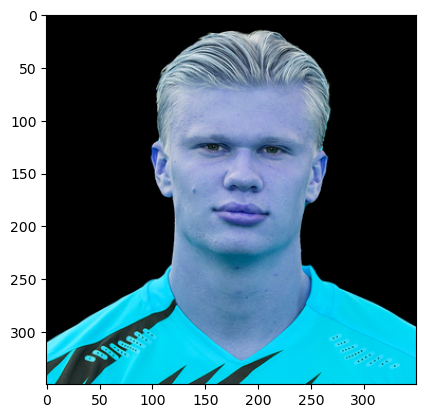

In [6]:
plt.imshow(img)

In [7]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(350, 350)

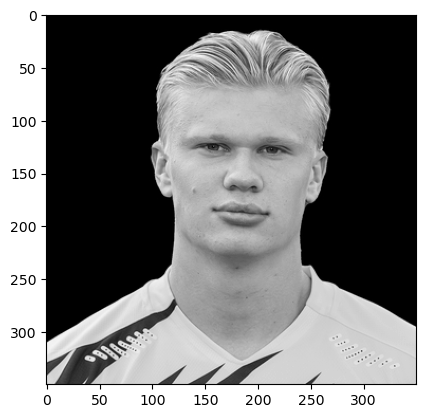

In [8]:
plt.imshow(gray, cmap='gray')

In [9]:
face_cascade = cv2.CascadeClassifier('C:\\Users\\nurik\\Desktop\\DataScience\\Image_Classification_Project\\Code\\Model\\Opencv\\haarcascade\\haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('C:\\Users\\nurik\\Desktop\\DataScience\\Image_Classification_Project\\Code\\Model\\Opencv\\haarcascade\\haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[100,  61, 173, 173]])

In [10]:
(x,y,w,h) = faces[0]
x,y,w,h

(100, 61, 173, 173)

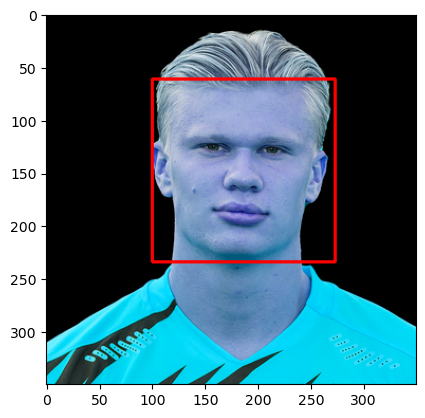

In [11]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

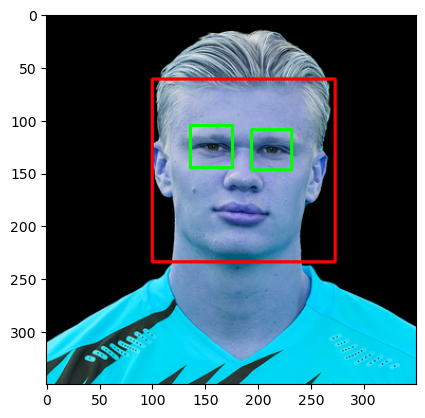

In [12]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

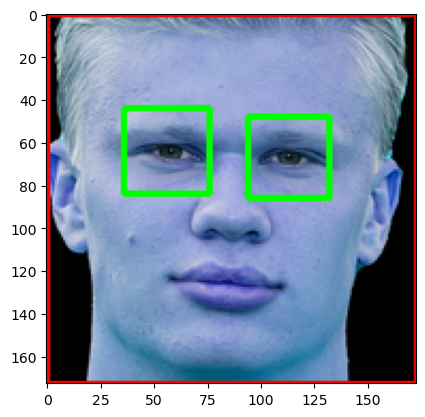

In [13]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [14]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

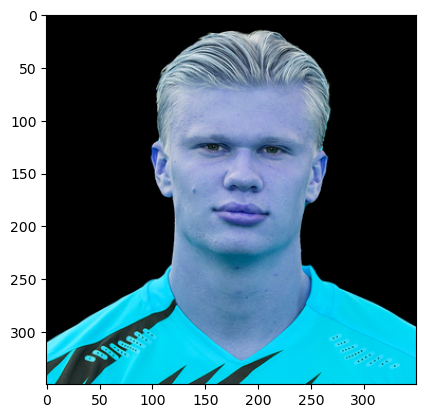

In [15]:
original_image = cv2.imread('./Test_images/holland.jpg')
plt.imshow(original_image)

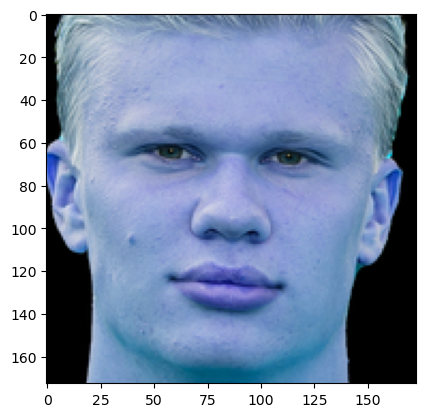

In [26]:
cropped_image = get_cropped_image_if_2_eyes('./Test_images/holland.jpg')
plt.imshow(cropped_image)

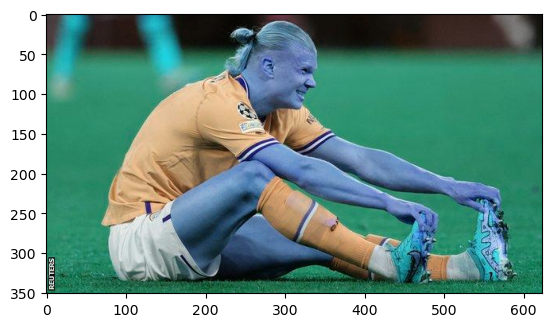

In [17]:
org_image_obstructed = cv2.imread('./Test_images/holland_obs.jpg')
plt.imshow(org_image_obstructed)

In [18]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes('./Test_images/holland_obs.jpg')
cropped_image_no_2_eyes

In [61]:
path_to_data = './dataset/'
path_to_cr_data = './dataset/cropped/'

In [62]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [63]:
img_dirs

['./dataset/De_Bruyne',
 './dataset/Holland',
 './dataset/Messi',
 './dataset/Neymar',
 './dataset/Ronaldo']

In [64]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [65]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ", cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count+=1

De_Bruyne
Generating cropped images in folder:  ./dataset/cropped/De_Bruyne
Holland
Generating cropped images in folder:  ./dataset/cropped/Holland
Messi
Generating cropped images in folder:  ./dataset/cropped/Messi
Neymar
Generating cropped images in folder:  ./dataset/cropped/Neymar
Ronaldo
Generating cropped images in folder:  ./dataset/cropped/Ronaldo


In [66]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

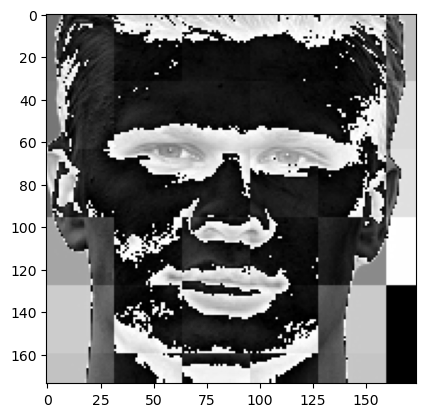

In [67]:
im_har = w2d(cropped_image,'db1',5)
plt.imshow(im_har, cmap='gray')

In [68]:
celebrity_file_names_dict

{'De_Bruyne': ['./dataset/cropped/De_Bruyne/De_Bruyne1.png',
  './dataset/cropped/De_Bruyne/De_Bruyne2.png',
  './dataset/cropped/De_Bruyne/De_Bruyne3.png',
  './dataset/cropped/De_Bruyne/De_Bruyne4.png',
  './dataset/cropped/De_Bruyne/De_Bruyne5.png',
  './dataset/cropped/De_Bruyne/De_Bruyne6.png',
  './dataset/cropped/De_Bruyne/De_Bruyne7.png',
  './dataset/cropped/De_Bruyne/De_Bruyne8.png',
  './dataset/cropped/De_Bruyne/De_Bruyne9.png',
  './dataset/cropped/De_Bruyne/De_Bruyne10.png',
  './dataset/cropped/De_Bruyne/De_Bruyne11.png',
  './dataset/cropped/De_Bruyne/De_Bruyne12.png',
  './dataset/cropped/De_Bruyne/De_Bruyne13.png',
  './dataset/cropped/De_Bruyne/De_Bruyne14.png',
  './dataset/cropped/De_Bruyne/De_Bruyne15.png',
  './dataset/cropped/De_Bruyne/De_Bruyne16.png',
  './dataset/cropped/De_Bruyne/De_Bruyne17.png',
  './dataset/cropped/De_Bruyne/De_Bruyne18.png',
  './dataset/cropped/De_Bruyne/De_Bruyne19.png',
  './dataset/cropped/De_Bruyne/De_Bruyne20.png',
  './dataset/cro

In [69]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'De_Bruyne': 0, 'Holland': 1, 'Messi': 2, 'Neymar': 3, 'Ronaldo': 4}

In [70]:
X = []
y = []

for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name]) 

In [91]:
len(X)

222

In [125]:
len(y)

222

In [92]:
len(X[0])

4096

In [93]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(222, 4096)

### Data cleaning process is done. Now we are ready to train our model
#### We will use SVM with rbf kernel tuned with heuristic finetuning

In [94]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.8

In [141]:
len(X_test)

45

In [142]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75         4
           1       0.88      0.93      0.90        15
           2       0.75      0.50      0.60         6
           3       0.86      0.67      0.75         9
           4       0.71      0.91      0.80        11

    accuracy                           0.80        45
   macro avg       0.79      0.75      0.76        45
weighted avg       0.80      0.80      0.79        45



### Let's use GridSearch to try out different models with different paramets. Goal is to come up with best model with best fine tuned parameters

In [143]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [144]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [145]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.768730,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.541905,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.836032,{'logisticregression__C': 5}


In [146]:
best_estimators['svm'].score(X_test,y_test)

0.8666666666666667

In [147]:
best_estimators['random_forest'].score(X_test,y_test)

0.6444444444444445

In [148]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.8

In [149]:
best_clf = best_estimators['svm']

In [150]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[ 4,  0,  0,  0,  0],
       [ 0, 14,  0,  1,  0],
       [ 0,  1,  3,  1,  1],
       [ 1,  1,  0,  7,  0],
       [ 0,  0,  0,  0, 11]], dtype=int64)

In [151]:
print(classification_report(y_test, best_clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       0.88      0.93      0.90        15
           2       1.00      0.50      0.67         6
           3       0.78      0.78      0.78         9
           4       0.92      1.00      0.96        11

    accuracy                           0.87        45
   macro avg       0.87      0.84      0.84        45
weighted avg       0.88      0.87      0.86        45



In [152]:
sec_clf = best_estimators['logistic_regression']

In [153]:
cm1 = confusion_matrix(y_test, sec_clf.predict(X_test))
cm1

array([[ 3,  1,  0,  0,  0],
       [ 1, 13,  0,  1,  0],
       [ 0,  1,  3,  1,  1],
       [ 0,  1,  0,  8,  0],
       [ 2,  0,  0,  0,  9]], dtype=int64)

In [154]:
print(classification_report(y_test, sec_clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.50      0.75      0.60         4
           1       0.81      0.87      0.84        15
           2       1.00      0.50      0.67         6
           3       0.80      0.89      0.84         9
           4       0.90      0.82      0.86        11

    accuracy                           0.80        45
   macro avg       0.80      0.76      0.76        45
weighted avg       0.83      0.80      0.80        45



Text(95.72222222222221, 0.5, 'Truth')

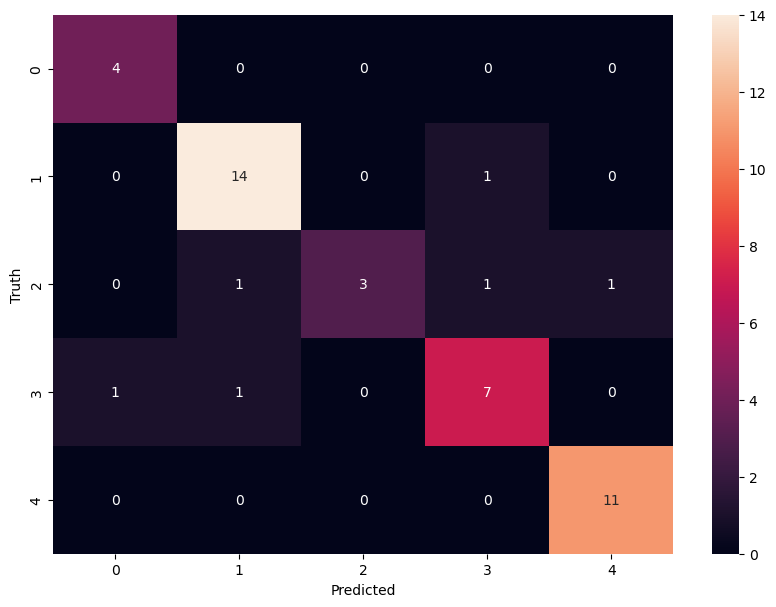

In [155]:
import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

Text(95.72222222222221, 0.5, 'Truth')

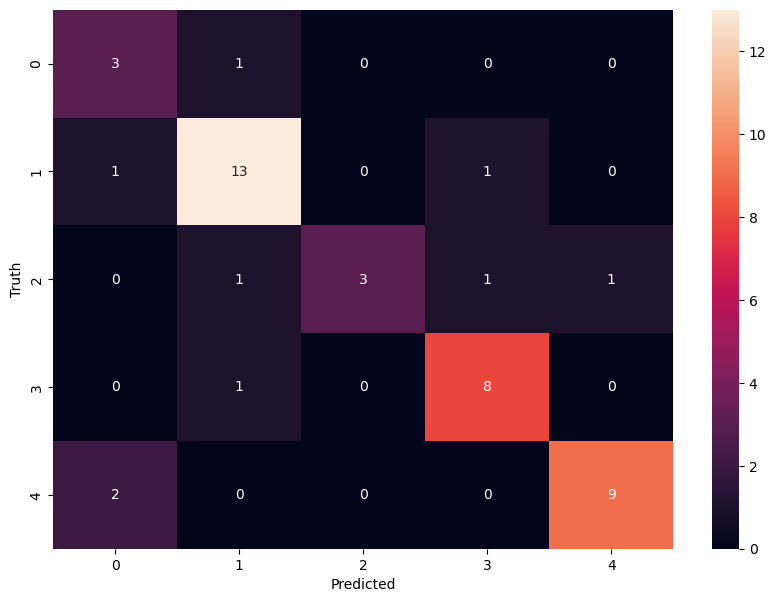

In [156]:
import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(cm1, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [157]:
class_dict

{'De_Bruyne': 0, 'Holland': 1, 'Messi': 2, 'Neymar': 3, 'Ronaldo': 4}

In [158]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 

['saved_model.pkl']

In [159]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))